#### Solubility prediction with TensorFlow-Keras fully-connected neural networks and LIME for model explainability

In [1]:
import pandas as pd
import numpy as np

In [2]:
sol_df = pd.read_csv('../data/solubility_data.csv', delimiter=';')
sol_df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type
0,CHEMBL1563607,NaN,None,321.33,0,3.69,548,Cc1onc(-c2ccccc2)c1C(=O)OCC(=O)c1ccccc1,Solubility,NaN,...,NaN,NO TARGET,CHEMBL3301361,27,AstraZeneca Deposited Data,NaN,NaN,None,NaN,NaN
1,CHEMBL75791,NaN,None,296.76,0,4.12,330,Nc1nc(Nc2ccc(Cl)cc2)cc(-c2ccccc2)n1,Solubility,NaN,...,NaN,NO TARGET,CHEMBL3301361,27,AstraZeneca Deposited Data,NaN,NaN,None,NaN,NaN
2,CHEMBL440727,NaN,None,329.33,0,3.54,159,COc1cc2ncnc(Nc3cc(O)c(C)cc3F)c2cc1OC,Solubility,NaN,...,NaN,NO TARGET,CHEMBL3301361,27,AstraZeneca Deposited Data,NaN,NaN,None,NaN,NaN
3,CHEMBL408963,NaN,None,558.73,1,4.47,4983,Cc1ccc(CCCO)c(NCc2ccc3nc(NCCCN4CCOCC4)n(Cc4nc(...,Solubility,NaN,...,NaN,NO TARGET,CHEMBL3301361,27,AstraZeneca Deposited Data,NaN,NaN,None,NaN,NaN
4,CHEMBL455651,NaN,None,386.41,0,3.61,3371,CNC(=O)c1ccc(Nc2ncc(F)c(-c3cnc(C)n3C(C)C)n2)cc1F,Solubility,NaN,...,NaN,NO TARGET,CHEMBL3301361,27,AstraZeneca Deposited Data,NaN,NaN,None,NaN,NaN


In [3]:
sol_df.columns

Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type'],
      dtype='object')

In [4]:
sol_df[sol_df['Potential Duplicate'] == True]

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type


In [5]:
sol_ml_df = sol_df.iloc[:,:12].copy()
sol_ml_df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units
0,CHEMBL1563607,NaN,None,321.33,0,3.69,548,Cc1onc(-c2ccccc2)c1C(=O)OCC(=O)c1ccccc1,Solubility,NaN,2000.0,nM
1,CHEMBL75791,NaN,None,296.76,0,4.12,330,Nc1nc(Nc2ccc(Cl)cc2)cc(-c2ccccc2)n1,Solubility,NaN,2200.0,nM
2,CHEMBL440727,NaN,None,329.33,0,3.54,159,COc1cc2ncnc(Nc3cc(O)c(C)cc3F)c2cc1OC,Solubility,NaN,2200.0,nM
3,CHEMBL408963,NaN,None,558.73,1,4.47,4983,Cc1ccc(CCCO)c(NCc2ccc3nc(NCCCN4CCOCC4)n(Cc4nc(...,Solubility,NaN,3700.0,nM
4,CHEMBL455651,NaN,None,386.41,0,3.61,3371,CNC(=O)c1ccc(Nc2ncc(F)c(-c3cnc(C)n3C(C)C)n2)cc1F,Solubility,NaN,4100.0,nM


In [6]:
sol_ml_df.drop(['Molecule Name', 'Standard Relation'], axis=1, inplace=True)

In [7]:
sol_ml_df.shape

(1763, 10)

In [8]:
# log transform solubility values
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p)

# add log trasformed data to dataframe
sol_ml_df['LogTransformed Value'] = transformer.transform(sol_ml_df['Standard Value']/1000)
sol_ml_df['LogTransformed Units'] = 'log(uM)'

sol_ml_df.head()

,Molecule ChEMBL ID,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Value,Standard Units,LogTransformed Value,LogTransformed Units
0,CHEMBL1563607,None,321.33,0,3.69,548,Cc1onc(-c2ccccc2)c1C(=O)OCC(=O)c1ccccc1,Solubility,2000.0,nM,1.098612,log(uM)
1,CHEMBL75791,None,296.76,0,4.12,330,Nc1nc(Nc2ccc(Cl)cc2)cc(-c2ccccc2)n1,Solubility,2200.0,nM,1.163151,log(uM)
2,CHEMBL440727,None,329.33,0,3.54,159,COc1cc2ncnc(Nc3cc(O)c(C)cc3F)c2cc1OC,Solubility,2200.0,nM,1.163151,log(uM)
3,CHEMBL408963,None,558.73,1,4.47,4983,Cc1ccc(CCCO)c(NCc2ccc3nc(NCCCN4CCOCC4)n(Cc4nc(...,Solubility,3700.0,nM,1.547563,log(uM)
4,CHEMBL455651,None,386.41,0,3.61,3371,CNC(=O)c1ccc(Nc2ncc(F)c(-c3cnc(C)n3C(C)C)n2)cc1F,Solubility,4100.0,nM,1.629241,log(uM)


In [9]:
from rdkit import Chem

mols = [Chem.MolFromSmiles(smi) for smi in sol_ml_df['Smiles']]

In [10]:
from rdkit.Chem import rdMolDescriptors

fp = [rdMolDescriptors.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048) for mol in mols]
fp = np.asarray(fp, dtype=float)
fp.shape

(1763, 2048)

In [11]:
from sklearn.model_selection import train_test_split

features = fp
target = sol_ml_df['LogTransformed Value']
ids = sol_ml_df['Molecule ChEMBL ID']
smiles = sol_ml_df['Smiles']

np.random.seed(0)

train_features, test_features, train_target, test_target, train_ids, test_ids, train_smiles, test_smiles = train_test_split(
    features, target, ids, smiles, test_size=0.3, random_state = 0)

In [12]:
print(train_features.shape)
print(train_target.shape)
print(train_ids.shape)
print(train_smiles.shape)

(1234, 2048)
(1234,)
(1234,)
(1234,)


In [13]:
print(test_features.shape)
print(test_target.shape)
print(test_ids.shape)
print(test_smiles.shape)

(529, 2048)
(529,)
(529,)
(529,)


In [14]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2023-06-20 21:11:40.260624: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 21:11:41.005012: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/lac/anaconda3/envs/deepchem_env/lib/
2023-06-20 21:11:41.005148: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/lac/anaconda3/envs/deepchem_env/lib/
2023-06-20 21:11:41.005157: W tensorflow/c

In [15]:
# Build fully-connected neural network for regression using Sequential API
# single output unit with no activation function
model = Sequential([
    Dense(units=32, activation="relu", input_shape=(train_features.shape[1],)),
    Dense(units=32, activation="relu"),
    Dense(units=1)
])

2023-06-20 21:11:47.039303: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/lac/anaconda3/envs/deepchem_env/lib/
2023-06-20 21:11:47.039322: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-20 21:11:47.039376: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: lac-rog
2023-06-20 21:11:47.039385: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: lac-rog
2023-06-20 21:11:47.039492: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2023-06-20 21:11:47.039530: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.c

In [16]:
# Compile neural network
model.compile(optimizer="adam", # Optimization algorithm
              loss="mse", # Mean squared error
              metrics=["mse"]
             )

In [17]:
# Train neural network
history=model.fit(train_features,
                  train_target,
                  epochs=20,
                  batch_size= 100,
                  validation_data=(test_features,test_target),
                  verbose=1
                 )

Epoch 1/20
13/13 [==============================] - 1s 21ms/step - loss: 13.4944 - mse: 13.4944 - val_loss: 8.5930 - val_mse: 8.5930
Epoch 2/20
13/13 [==============================] - 0s 7ms/step - loss: 6.2605 - mse: 6.2605 - val_loss: 5.1362 - val_mse: 5.1362
Epoch 3/20
13/13 [==============================] - 0s 7ms/step - loss: 5.0353 - mse: 5.0353 - val_loss: 4.6269 - val_mse: 4.6269
Epoch 4/20
13/13 [==============================] - 0s 6ms/step - loss: 4.1031 - mse: 4.1031 - val_loss: 4.2714 - val_mse: 4.2714
Epoch 5/20
13/13 [==============================] - 0s 6ms/step - loss: 3.5681 - mse: 3.5681 - val_loss: 3.9773 - val_mse: 3.9773
Epoch 6/20
13/13 [==============================] - 0s 6ms/step - loss: 3.1972 - mse: 3.1972 - val_loss: 3.8568 - val_mse: 3.8568
Epoch 7/20
13/13 [==============================] - 0s 6ms/step - loss: 2.8504 - mse: 2.8504 - val_loss: 3.7865 - val_mse: 3.7865
Epoch 8/20
13/13 [==============================] - 0s 6ms/step - loss: 2.5589 - mse: 2

In [18]:
print(model.evaluate(test_features, test_target))

17/17 [==============================] - 0s 2ms/step - loss: 3.5328 - mse: 3.5328
[3.5327682495117188, 3.5327682495117188]


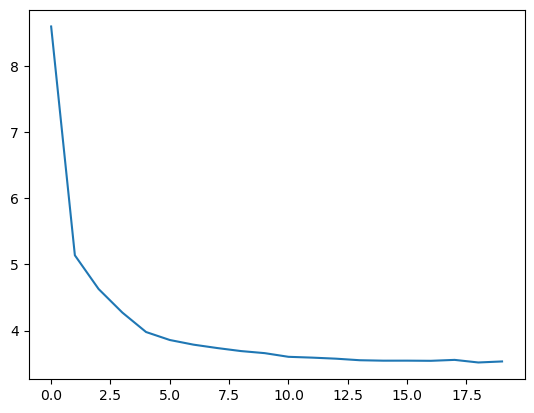

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['val_mse'])
plt.show()

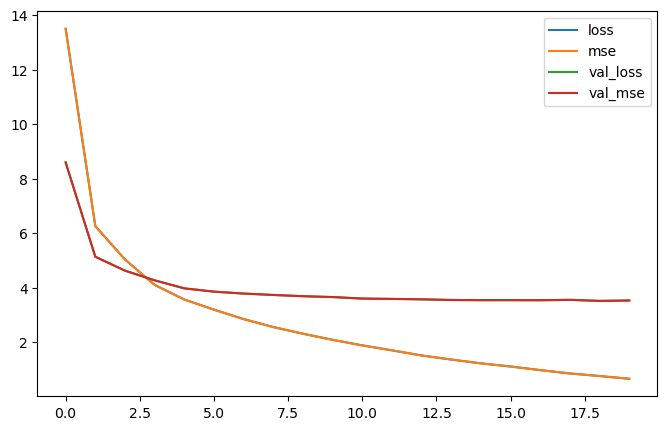

In [20]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [21]:
pred_train = model.predict(train_features)
pred_test = model.predict(test_features)

17/17 [==============================] - 0s 2ms/step


In [22]:
df_cm = pd.DataFrame({'id': test_ids, 'smiles': test_smiles, 'actual': test_target, 'predicted': pred_test.flatten()})

In [23]:
df_cm.head()

,id,smiles,actual,predicted
1165,CHEMBL2023117,CCn1cc(NC(=O)Cc2ccc(Oc3ccnc4cc(OC)c(OC)cc34)cc...,3.173878,2.021220
668,CHEMBL1528627,CN(C)C(=O)c1nnsc1Sc1ccc(Cl)cc1,3.484312,1.312876
412,CHEMBL130873,COc1cc(C(=O)NS(=O)(=O)c2ccccc2C)ccc1Cc1cn(C)c2...,4.980176,2.785625
558,CHEMBL2336324,C[C@H]1COCCN1c1nc(N2CCOC[C@@H]2C)c2ccc(-c3ccc4...,4.660605,3.515935
1344,CHEMBL2158835,O=C(O)[C@H](Cc1ccccc1)N1CCC(CN2CCC(Oc3ccc(Cl)c...,2.674149,4.316517


In [24]:
# LIME - Local Interpretable Model-agnostic Explanations
# Qualitative understanding between the input features and the prediction response
# Learns an interpretable model locally around the prediction

! pip install lime

In [25]:
from lime import lime_tabular

# create feature names for the circular fingerprints
feature_names = ["fp_%s" % x for x in range(2048)]

# create Explainer object for lime with the training data and feature names.
explainer = lime_tabular.LimeTabularExplainer(train_features,
                                             feature_names=feature_names,
                                             categorical_features=feature_names,
                                             class_names=['Solubility log(uM)'],
                                             mode='regression',
                                             verbose=True)

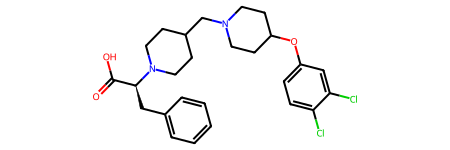

In [26]:
Chem.MolFromSmiles(df_cm.iloc[4]['smiles'])

In [27]:
df_cm.iloc[4]

id                                               CHEMBL2158835
smiles       O=C(O)[C@H](Cc1ccccc1)N1CCC(CN2CCC(Oc3ccc(Cl)c...
actual                                                2.674149
predicted                                             4.316517
Name: 1344, dtype: object

In [28]:
# Explain a prediction on an instance of the testset
# Returned explanation object contains information 
# about which features (fingerprint indices) were most influential for the prediction 
# and their contribution

expl = explainer.explain_instance(test_features[4], model.predict, num_features=5)

expl.show_in_notebook(show_table=True)

157/157 [==============================] - 0s 2ms/step
Intercept 3.3300476591501833
Prediction_local [3.66563194]
Right: 4.3165174


In [29]:
# calculate which fragments activated what fingerprints in a selected molecule

def fp_mol(mol):

    """
    returns: dict of <int:list of string>
        dictionary mapping fingerprint index
        to list of smile string that activated that fingerprint
    """
    d = {}
    bitinfo = {}
    retval = rdMolDescriptors.GetMorganFingerprint(mol, 2, bitInfo=bitinfo)
    
    retval = retval.GetNonzeroElements()  # convert to a dict
  
    fp_smiles = {}
    
    for fragment_id, count in retval.items():
        root, radius = bitinfo[fragment_id][0]
        env = Chem.FindAtomEnvironmentOfRadiusN(mol, radius, root)
        frag = Chem.PathToSubmol(mol, env)
        smiles = Chem.MolToSmiles(frag)
        fp_smiles[fragment_id] = {'smiles': smiles, 'count': count}
    
    retval = fp_smiles
     
    for k, v in retval.items():
        index = k % 2048
        if index not in d:
            d[index] = set()
        d[index].add(v['smiles'])
    return d

In [30]:
fg_fp = fp_mol(Chem.MolFromSmiles(df_cm.iloc[4]['smiles']))

In [31]:
fg_fp

{79: {'CCc'},
 1088: {'ccc'},
 1265: {'CN(C)C'},
 1261: {'CCCN(C)C'},
 524: {'COc'},
 807: {''},
 695: {''},
 650: {''},
 1880: {'cC[C@@H](C(=O)O)N(C)C'},
 1750: {'ccc'},
 875: {'C[C@H](N)C(=O)O', 'ccc'},
 1683: {''},
 1066: {'cccc(c)C'},
 1586: {'CCN(CC)CC'},
 888: {'cc(c)OC(C)C'},
 119: {'CC(C)O'},
 1917: {'C=O'},
 389: {'CO', 'ccccc'},
 1402: {'ccc(Cl)c(c)Cl'},
 1791: {'CN(C)C'},
 29: {'CC(C)C'},
 1454: {'cc(O)cc(c)Cl'},
 908: {'CCN'},
 959: {'CC(O)CCN'},
 935: {''},
 1325: {'CCC'},
 1: {''},
 80: {''},
 214: {'CCC(CC)CN'},
 366: {'cc(c)Cl'},
 595: {'ccc(cc)OC'},
 738: {'CCCN(C)C'},
 2039: {'CC(C)N'},
 1480: {'CCN'},
 800: {'CC(C)CCN'},
 857: {'ccc(cc)CC'},
 718: {'cccc(c)O'},
 926: {''},
 1019: {''},
 666: {'cccc(c)Cl'},
 322: {'cc(c)O'},
 1375: {'CCN(CC)C(C)C'},
 1380: {''},
 1873: {''},
 39: {'CCC(CC)Oc'},
 1554: {'ccc(Cl)c(c)Cl'},
 561: {'cCl'},
 1844: {'CC(=O)O'},
 1199: {'ccccc'},
 1809: {'CC(C)CN(C)C'},
 1291: {'cc(c)C[C@@H](C)N'},
 1754: {'cc(c)C'}}

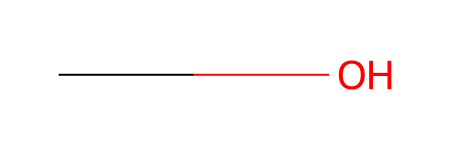

In [32]:
Chem.MolFromSmiles(list(fg_fp[389])[1], sanitize = False)

In [33]:
# calculate which fragments activate all fingerprint
# indexes throughout the entire training set

all_train_fps = {}
smiles = list(train_smiles)
for i in range(len(smiles)):
    d = fp_mol(Chem.MolFromSmiles(smiles[i]))
    for k, v in d.items():
        if k not in all_train_fps:
            all_train_fps[k] = set()
        all_train_fps[k].update(v)

In [35]:
list(all_train_fps[389])

['ccc(nc)c(c)c',
 'CCNC(C)=O',
 'cc(c)C[C@H](C)O',
 'CO',
 'ccccc',
 'cc(c)C[C@@H](C)O',
 'CC(c)c']

In [36]:
# Chem.MolFromSmiles(list(all_train_fps[389])[3], sanitize=False)

[21:14:20] non-ring atom 0 marked aromatic
[21:14:20] non-ring atom 0 marked aromatic
[21:14:20] non-ring atom 0 marked aromatic
[21:14:20] non-ring atom 0 marked aromatic
[21:14:20] non-ring atom 2 marked aromatic


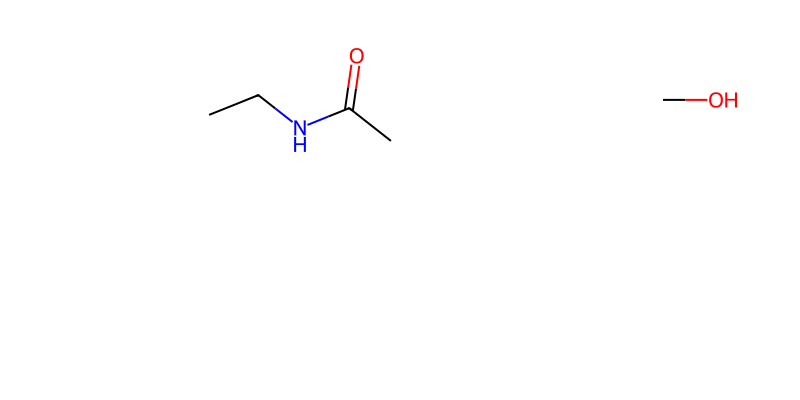

In [37]:
from rdkit.Chem import Draw

sol_frag_fp_389 = [Chem.MolFromSmiles(smi) for smi in list(all_train_fps[389])]

Draw.MolsToGridImage(mols=sol_frag_fp_389, molsPerRow=4)

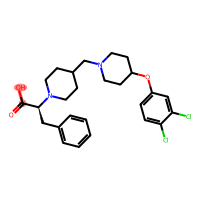

In [38]:
# Map the fragments that activate the fingerprints on selected molecule
# increase water solubility
mol_list = [Chem.MolFromSmiles(df_cm.iloc[4]['smiles'])]
hydroxyl_ether = Chem.MolFromSmarts('CO')
match_list = [mol.GetSubstructMatches(hydroxyl_ether) for mol in mol_list]
(m1, m2) = match_list[0]

Draw.MolsToGridImage(mols=mol_list, highlightAtomLists=[m1], molsPerRow=1)

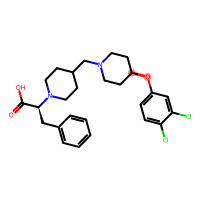

In [39]:
Draw.MolsToGridImage(mols=mol_list, highlightAtomLists=[m2], molsPerRow=1)

[21:21:26] non-ring atom 0 marked aromatic
[21:21:26] non-ring atom 2 marked aromatic
[21:21:26] non-ring atom 0 marked aromatic
[21:21:26] non-ring atom 0 marked aromatic
[21:21:26] non-ring atom 0 marked aromatic


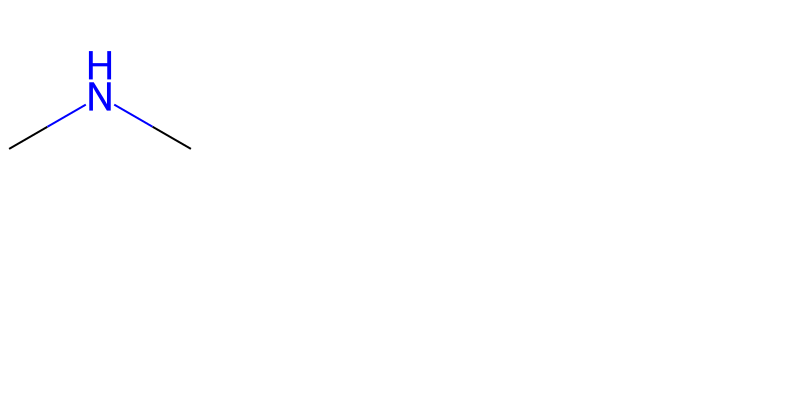

In [41]:
sol_frag_fp_1866 = [Chem.MolFromSmiles(smi) for smi in list(all_train_fps[1866])]

Draw.MolsToGridImage(mols=sol_frag_fp_1866, molsPerRow=4)

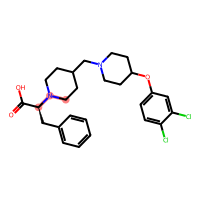

In [42]:
# Map the fragments that de-activate fingerprints on selected molecule
# decrease water solubility
mol_list = [Chem.MolFromSmiles(df_cm.iloc[4]['smiles'])]
dimethylamine = Chem.MolFromSmarts('CNC')
match_list = [mol.GetSubstructMatches(dimethylamine) for mol in mol_list]
(m1, m2, m3, m4, m5, m6) = match_list[0]
Draw.MolsToGridImage(mols=mol_list, highlightAtomLists=[m1], molsPerRow=1)

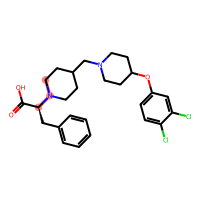

In [43]:
Draw.MolsToGridImage(mols=mol_list, highlightAtomLists=[m2], molsPerRow=1)

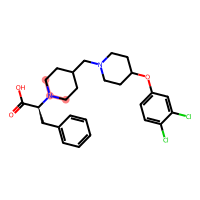

In [44]:
Draw.MolsToGridImage(mols=mol_list, highlightAtomLists=[m3], molsPerRow=1)

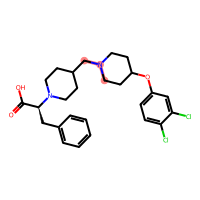

In [45]:
Draw.MolsToGridImage(mols=mol_list, highlightAtomLists=[m4], molsPerRow=1)

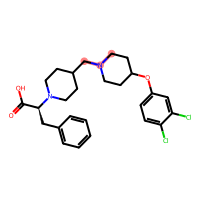

In [46]:
Draw.MolsToGridImage(mols=mol_list, highlightAtomLists=[m5], molsPerRow=1)

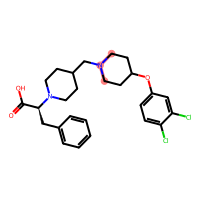

In [47]:
Draw.MolsToGridImage(mols=mol_list, highlightAtomLists=[m6], molsPerRow=1)